In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.integrate import dblquad, quad, simpson

#import autograd.numpy as np
#from autograd import grad
import numdifftools as nd

 - https://math.stackexchange.com/questions/2099318/determine-the-surface-of-a-cardioid

In [6]:
a = 2.

In [7]:
def model(x, y):
    return x**2 + y**2

In [41]:
x = np.linspace(-2.1, 2.1, 50)
y = np.linspace(-2.1, 2.1, 50)
X, Y = np.meshgrid(x, y)
Z = model(X, Y)

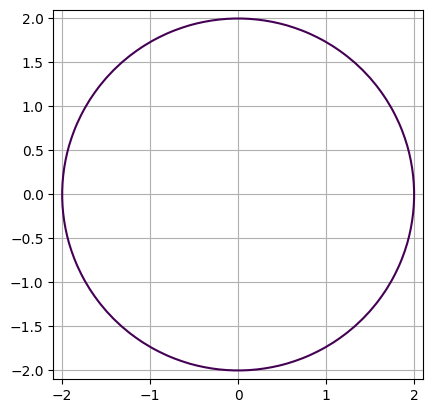

In [42]:
fig, axe = plt.subplots()
contour = axe.contour(X, Y, Z, levels=[a**2])
axe.set_aspect("equal")
axe.grid()

In [43]:
x, y = contour.collections[0].get_paths()[0].vertices.T

In [44]:
x.shape

(185,)

In [45]:
t = np.linspace(0, 2 * np.pi, x.size)

In [46]:
fx = interp1d(t, x, fill_value=x[0], bounds_error=False, kind='cubic')
fy = interp1d(t, y, fill_value=y[0], bounds_error=False, kind='cubic')

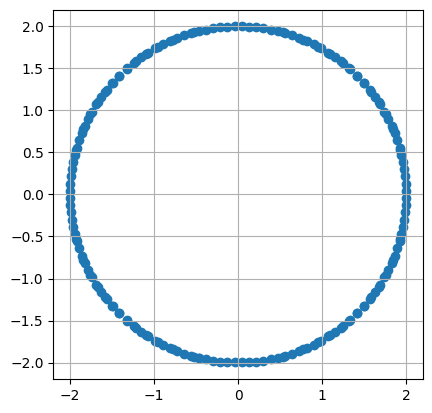

In [47]:
fig, axe = plt.subplots()
axe.scatter(x, y)
axe.set_aspect("equal")
axe.grid()

In [48]:
def integrand(t):
    return fx(t)*nd.Derivative(fy)(t)

In [54]:
I = quad(integrand, t.min(), t.max(), limit=300)
I

/tmp/ipykernel_535/2286621710.py:1: IntegrationWarning: The maximum number of subdivisions (300) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = quad(integrand, t.min(), t.max(), limit=300)


(-12.560460398654016, 0.0007583550607890288)

In [55]:
A = a**2 * np.pi
A

12.566370614359172

In [56]:
-I[0] - A

-0.005910215705156929

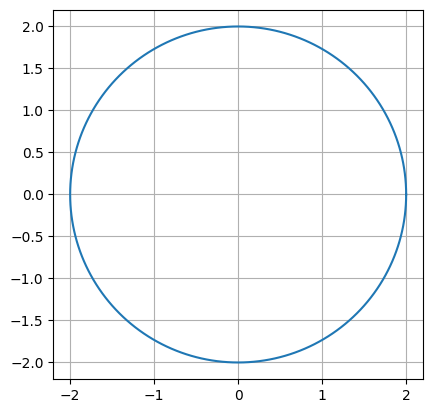

In [11]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.set_aspect("equal")
axe.grid()